# Análise do arquivo STG_MVT_CRD.xlsx

# Mapa de preenchimento da tabela

In [77]:
#Importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import seaborn as sns

In [202]:
#Define variáveis para as tabelas que serão analisadas
df = pd.read_excel ('STG_MVT_CRD.xlsx')
cf = pd.read_excel ('STG_MDL.xlsx')

In [203]:
#Converte todos os valores para acrescentar dois decimais
for c in df.VLR_PCL_FAT:
    d = c * 0.01
    df.VLR_PCL_FAT = df.VLR_PCL_FAT.replace(c, d)

for c in df.VLR_TOT_FAT:
    d = c * 0.01
    df.VLR_TOT_FAT = df.VLR_TOT_FAT.replace(c, d)
    
for c in df.VLR_MIM_FAT:
    d = c * 0.01
    df.VLR_MIM_FAT = df.VLR_MIM_FAT.replace(c, d)

for c in df.VLR_SDO_UTZ_CRD_RTO:
    d = c * 0.01
    df.VLR_SDO_UTZ_CRD_RTO = df.VLR_SDO_UTZ_CRD_RTO.replace(c, d)

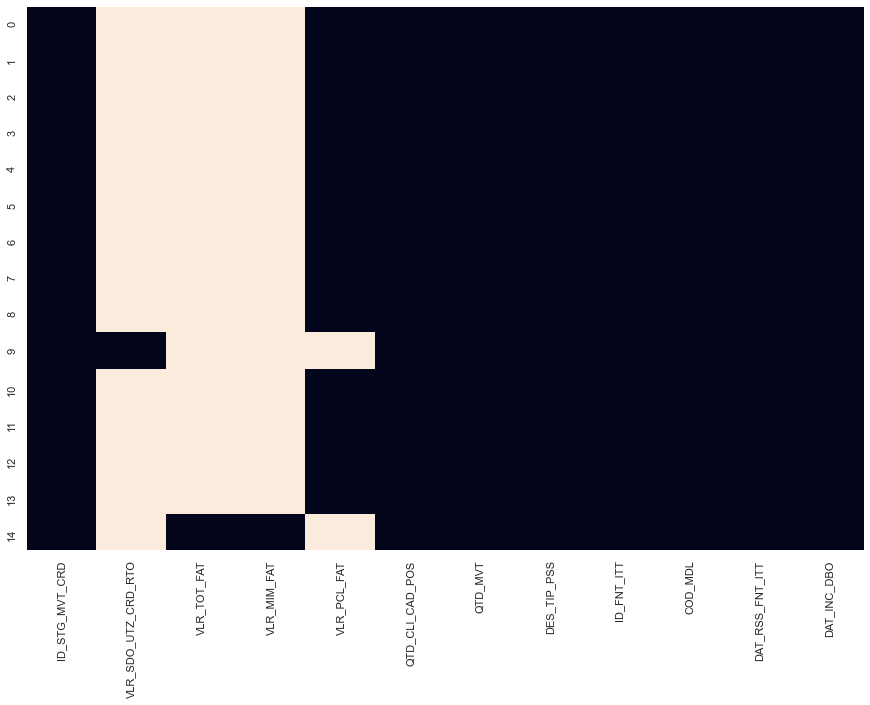

In [204]:
#Cria um mapa para visualizar as células vazias da tabela
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.isnull(), cbar=False)

# Analisando a qualidade dos dados após o tratamento

In [205]:
#Define as variáveis excluindo as modalidades que não fazem parte da categoria
nocredcard = df[df.COD_MDL != 'D01'] #Desprezo a linha do Cartão de Crédito
nocredcard = nocredcard[nocredcard.COD_MDL != 'E01'] #Desprezo a linha do Cheque Especial
rotativo = df[df.COD_MDL == 'E01'] #Analiso apenas a linha do Cheque Especial
cred = df[df.COD_MDL == 'D01'] #Analiso apenas a linha do Cartão de Crédito

colunas = [nocredcard.VLR_PCL_FAT, cred.VLR_MIM_FAT, cred.VLR_TOT_FAT, 
           df.QTD_CLI_CAD_POS, df.QTD_MVT, rotativo.QTD_MVT]

#Crio uma nova tabela
parcelreview = pd.DataFrame({'Campos Válidos': [coluna.notna().mean().round(4) * 100 for coluna in colunas], 
                             'Campos Incompletos': [coluna.isna().mean().round(4) * 100 for coluna in colunas]},
                           index=['Valor das Parcelas', 'Valor Mínimo da Fatura do Cartão de Crédito', 
                             'Valor Total da Fatura do Cartão de Crédito', 'Quantidade de Clientes', 
                             'Quantidade de Movimentações', 'Saldo Devedor do Cheque Especial'])
parcelreview

,Campos Válidos,Campos Incompletos
Valor das Parcelas,100.0,0.0
Valor Mínimo da Fatura do Cartão de Crédito,100.0,0.0
Valor Total da Fatura do Cartão de Crédito,100.0,0.0
Quantidade de Clientes,100.0,0.0
Quantidade de Movimentações,100.0,0.0
Saldo Devedor do Cheque Especial,100.0,0.0


Text(0.5, 0, '\nPorcentagem de Validação (%)')

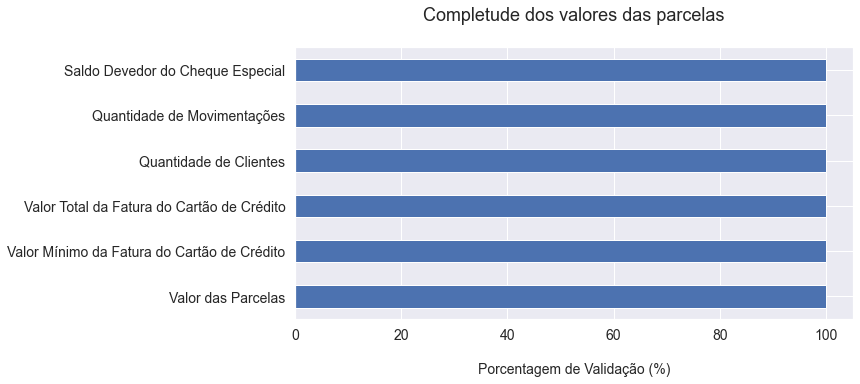

In [206]:
#Plota o resultado em formato gráfico
parcelreview.plot(kind="barh", stacked = True, legend = False, figsize = (10,5), fontsize = 14)
plt.title('Completude dos valores das parcelas\n', fontsize = 18)
plt.xlabel('\nPorcentagem de Validação (%)', fontsize = 14)

In [207]:
#Verifica e compara a coluna de códigos das duas tabelas
verificadf = []
for x in cf.COD_MDL:
    verificadf.append (x)

L = df.COD_MDL
diferente = 0
lista_diferente = []

for x in L:
    if x not in verificadf:
        diferente += 1
        if x not in lista_diferente:
            lista_diferente.append (x)

porcentagem = 0
diferenca = 0

if diferente == 0:
    porcentagem = 100
    diferenca = 0
else:
    diferenca = diferente *100/len(L)
    porcentagem = 100 - diferenca

modalreview = pd.DataFrame({'Código Validados': [porcentagem],
                            'Códigos Invalidados': [diferenca]},
                          index=['Códigos das Modalidades'])
modalreview

,Código Validados,Códigos Invalidados
Códigos das Modalidades,100,0


Text(0.5, 0, '\nPorcentagem de Validação (%)')

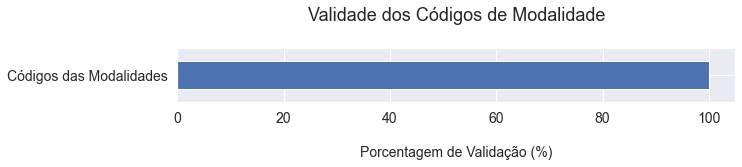

In [208]:
#Plota o resultado em formato gráfico
modalreview.plot(kind="barh", stacked = True, legend = False, figsize = (10,1), fontsize = 14)
plt.title('Validade dos Códigos de Modalidade\n', fontsize = 18)
plt.xlabel('\nPorcentagem de Validação (%)', fontsize = 14)

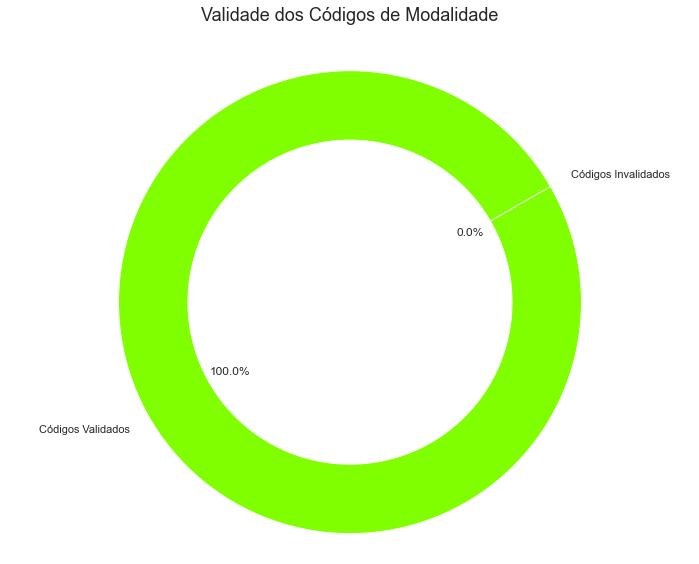

In [209]:
#Plota em gráfico de setores
labels = ['Códigos Validados', 'Códigos Invalidados']
sizes = [porcentagem, diferenca]

colors = ['chartreuse','#66b3ff']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Validade dos Códigos de Modalidade\n', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [210]:
#Verifica a coluna DAT_INC_DBO
dt = df['DAT_INC_DBO'].astype('str')
total_lista = []
total_igual = 0
linhas = len(dt)
c = 0
i = 0
for c in range (len(dt)):
    igual = 0
    diferente = 0
    for i in range (len(dt)):
        if dt[i] == dt[c]:
            igual = igual + 1
    total_lista.append (igual)
maior = 0
campo = 0
for i in range (len(total_lista)):
    if total_lista[i] > maior:
        maior = total_lista[i]
        campo_a = i
maior_dt = maior*100/linhas
menor_dt = 100-maior_dt

#Verifica a coluna DAT_RSS_FNT_ITT
da = df['DAT_RSS_FNT_ITT'].astype('str')
total_lista = []
total_igual = 0
linhas = len(da)
c = 0
i = 0
for c in range (len(da)):
    igual = 0
    diferente = 0
    for i in range (len(da)):
        if da[i] == da[c]:
            igual = igual + 1
    total_lista.append (igual)
maior = 0
campo = 0
for i in range (len(total_lista)):
    if total_lista[i] > maior:
        maior = total_lista[i]
        camp = i
maior_da = maior*100/linhas
menor_da = 100-maior_da

panel = ('Data de Inclusão: %s (mais encontrada)' % (dt[campo_a]))
panelb = ('Data de Última Alteração: %s (mais encontrada)' % (da[campo]))
detos = [panel, panelb]
datas = 'Datas'
labels=['Mais Encontrada', 'Outras Datas']

datareview = pd.DataFrame({labels[0]: [maior_dt, maior_da],
                           labels[1]: [menor_dt, menor_da]},
                         index = [panel, panelb])

datareview

,Mais Encontrada,Outras Datas
Data de Inclusão: 2020-01-17 17:49:17.524 (mais encontrada),100.0,0.0
Data de Última Alteração: 2020-01-16 (mais encontrada),100.0,0.0


Text(0.5, 0, '\nPorcentagem de Validação (%)')

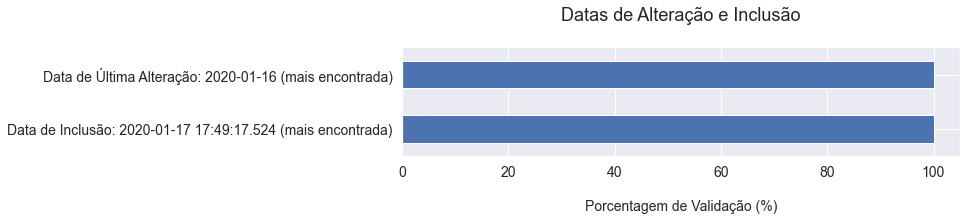

In [211]:
#Plota o resultado em formato gráfico
datareview.plot(kind="barh", stacked = True, legend = False, figsize = (10,2), fontsize = 14)
plt.title('Datas de Alteração e Inclusão\n', fontsize = 18)
plt.xlabel('\nPorcentagem de Validação (%)', fontsize = 14)

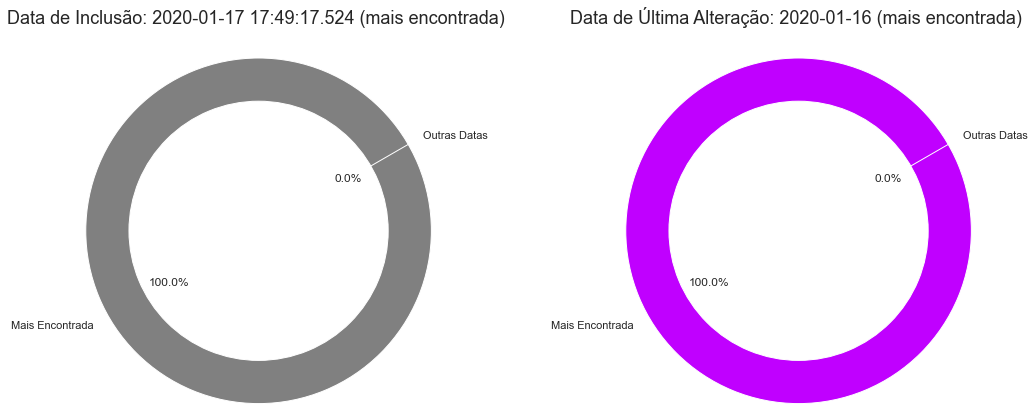

In [311]:
#Plota em gráfico de setores

td = pd.DataFrame({panel: [maior_dt, menor_dt],
                   panelb: [maior_da, menor_da]})

fig = plt.figure()
labels = ['Mais Encontrada', 'Outras Datas']

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(td[panel], labels=labels, radius = 1.2, colors = ['pink'], autopct='%1.1f%%', startangle=30, wedgeprops=dict(width=.3))

ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(td[panelb], labels=labels, radius = 1.2, colors = ['#c000ff'], autopct='%1.1f%%', startangle=30, wedgeprops=dict(width=.3))

ax1.set_title('%s \n' % panel, fontsize = 18)
ax2.set_title('%s \n' % panelb, fontsize = 18)

plt.show()

# Analisando o valor das parcelas por modalidade

In [89]:
#Troca os códigos das modalidades por seus nomes correspondentes

#Armazena os nomes em uma lista vazia
g = []
for i in cf.DES_MDL:
    g.append (i)

#Troca os código da tabela MVT pelos nomes correspondentes armazenados na lista anterior
for c in range (len(df.COD_MDL)):
    for i in range (len(cf.COD_MDL)):
        if cf.COD_MDL[i] == df.COD_MDL[c]:
            d = g[i]
            df.COD_MDL[c] = df.COD_MDL[c].replace(df.COD_MDL[c], g[i])

c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [90]:
#Cria uma nova tabela para analisar apenas os valores das parcelas
parcela = df[['COD_MDL', 'VLR_PCL_FAT']].groupby(['COD_MDL']).max().dropna()
parcela

,VLR_PCL_FAT
COD_MDL,
AVAIS E FIANCASA HONRADOS,2.152609e+04
CONSORCIO,4.595517e+08
EMPRESTIMO - CONSIGNADO,3.556795e+09
EMPRESTIMO - CREDITO PESSOAL,2.638331e+09
EMPRESTIMO - MICROCREDITO,9.738713e+06
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),1.838029e+09
FINANCIAMENTO - ARREENDAMENTO,4.607337e+06
FINANCIAMENTO - IMOBILIARIO (OUTROS),1.733950e+06
FINANCIAMENTO - IMOBILIARIOS SFH,6.111251e+08


Text(0.5, 0, '\nValores em R$ Bilhões')

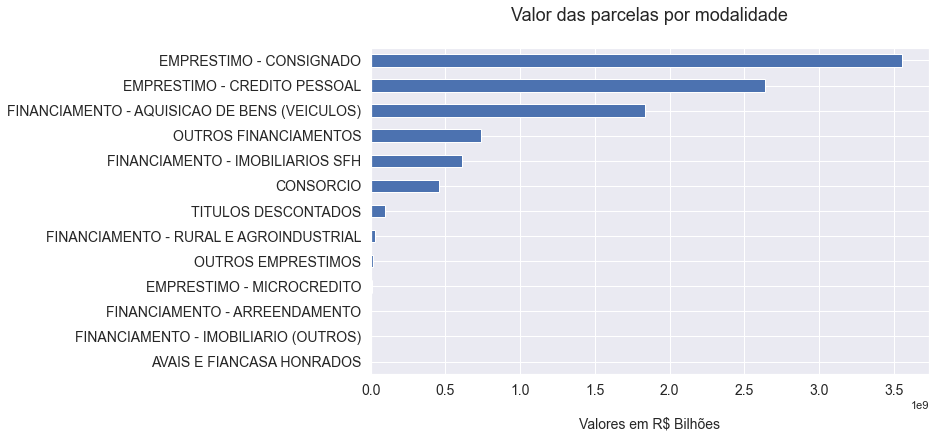

In [91]:
#Plota o resultado em formato gráfico
parcela = df[['COD_MDL', 'VLR_PCL_FAT']].groupby(['COD_MDL']).max().dropna()
parcela = parcela.VLR_PCL_FAT.sort_values()
parcela.plot(kind='barh', figsize = (10,6), fontsize = 14, legend = False)
plt.title('Valor das parcelas por modalidade\n', fontsize=18)
plt.ylabel("")
plt.xlabel("\nValores em R$ Bilhões", fontsize = 14)

# Analisando as faturas do cartão de crédito

In [92]:
#Cria uma nova tabela para analisar apenas as faturas do cartão de crédito
credito = df.query('COD_MDL == "CARTAO DE CREDITO"')
credito = credito[['COD_MDL', 'VLR_TOT_FAT', 'VLR_MIM_FAT']].groupby(['COD_MDL']).max().dropna()
credito

,VLR_TOT_FAT,VLR_MIM_FAT
COD_MDL,,
CARTAO DE CREDITO,1.932767e+10,6.071738e+09


Text(0.5, 0, '')

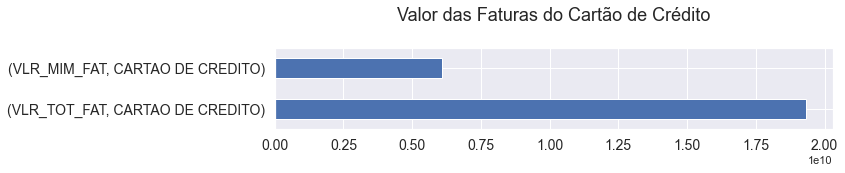

In [93]:
#Plota em gráfico de barras
credito = df[['COD_MDL', 'VLR_TOT_FAT', 'VLR_MIM_FAT']].groupby(['COD_MDL']).max().dropna().unstack()
credito.plot(kind='barh', figsize = (10,1.5), fontsize = 14, legend = False)
plt.title('Valor das Faturas do Cartão de Crédito\n', fontsize = 18)
plt.ylabel("")
plt.xlabel("", fontsize = 14)

# Analisando o saldo devedor do cheque especial

In [94]:
#Cria uma nova tabela para analisar apenas o saldo devedor do cheque especial
cheque = df.query('COD_MDL == "CHEQUE ESPECIAL E CONTA GARANTIDA"')
cheque = cheque[['COD_MDL', 'VLR_SDO_UTZ_CRD_RTO']].groupby(['COD_MDL']).max().dropna()
cheque

,VLR_SDO_UTZ_CRD_RTO
COD_MDL,
CHEQUE ESPECIAL E CONTA GARANTIDA,2.181758e+08


Text(0.5, 0, '')

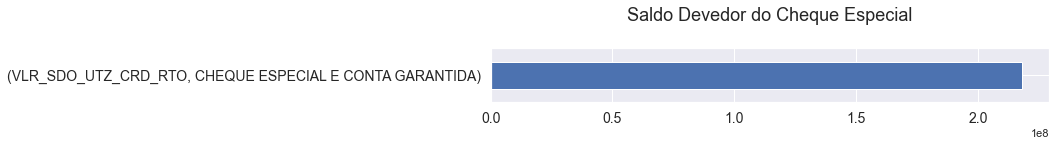

In [95]:
#Plota em gráfico de barras
cheque = df[["COD_MDL", "VLR_SDO_UTZ_CRD_RTO"]].groupby(['COD_MDL']).max().dropna().unstack()
cheque.plot(kind='barh', figsize = (10,1), fontsize = 14, legend = False)
plt.title('Saldo Devedor do Cheque Especial\n', fontsize = 18)
plt.ylabel("")
plt.xlabel("", fontsize = 14)

# Analisando o número de clientes por Modalidade

In [96]:
#Cria uma nova tabela para analisar apenas os número de clientes
cliente = df[['COD_MDL', 'QTD_CLI_CAD_POS']].groupby(['COD_MDL']).max().dropna()
cliente

,QTD_CLI_CAD_POS
COD_MDL,
AVAIS E FIANCASA HONRADOS,2
CARTAO DE CREDITO,1840240
CHEQUE ESPECIAL E CONTA GARANTIDA,194378
CONSORCIO,37186
EMPRESTIMO - CONSIGNADO,494442
EMPRESTIMO - CREDITO PESSOAL,721836
EMPRESTIMO - MICROCREDITO,5061
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),135773
FINANCIAMENTO - ARREENDAMENTO,33


Text(0.5, 0, '\nQuantidade')

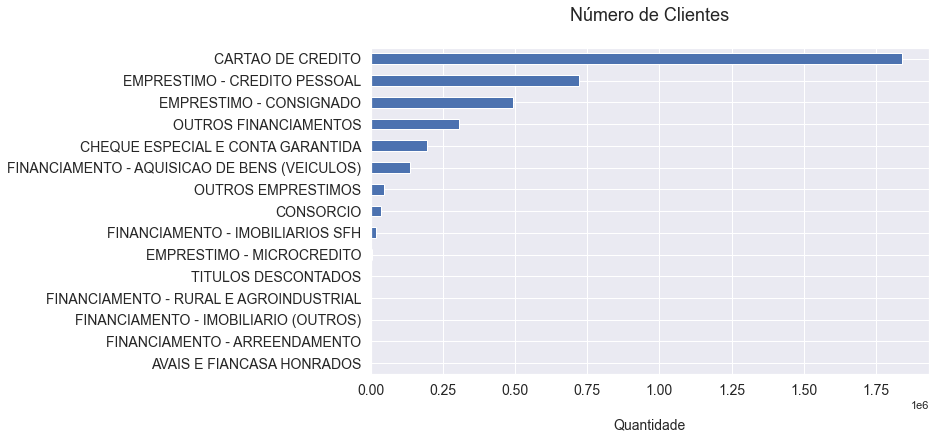

In [97]:
#Plota o resultado em formato gráfico
cliente = df[['COD_MDL', 'QTD_CLI_CAD_POS']].groupby(['COD_MDL']).max().dropna()
cliente = cliente.QTD_CLI_CAD_POS.sort_values()
cliente.plot(kind='barh', figsize = (10,6), fontsize = 14, legend = False)
plt.title('Número de Clientes\n', fontsize=18)
plt.ylabel("")
plt.xlabel("\nQuantidade", fontsize = 14)

# Analisando o número de movimentações por modalidade

In [98]:
#Cria uma nova tabela para analisar apenas os número de movimentações
movimentacao = df[['COD_MDL', 'QTD_MVT']].groupby(['COD_MDL']).max().dropna()
movimentacao

,QTD_MVT
COD_MDL,
AVAIS E FIANCASA HONRADOS,4
CARTAO DE CREDITO,21748501
CHEQUE ESPECIAL E CONTA GARANTIDA,194921
CONSORCIO,677272
EMPRESTIMO - CONSIGNADO,19241809
EMPRESTIMO - CREDITO PESSOAL,10020532
EMPRESTIMO - MICROCREDITO,38003
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),1797516
FINANCIAMENTO - ARREENDAMENTO,329


Text(0.5, 0, 'Quantidade')

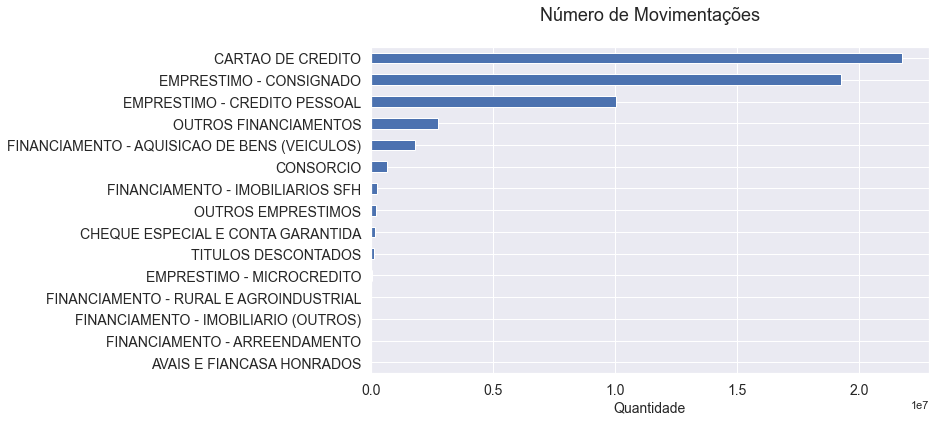

In [99]:
#Plota o resultado em formato gráfico
movimentacao = df[['COD_MDL', 'QTD_MVT']].groupby(['COD_MDL']).max().dropna()
movimentacao = movimentacao.QTD_MVT.sort_values()
movimentacao.plot(kind='barh', figsize = (10,6), fontsize = 14, legend = False)
plt.title('Número de Movimentações\n', fontsize=18)
plt.ylabel("")
plt.xlabel("Quantidade", fontsize = 14)

# Comparando todas as modalidades lado a lado na mesma escala

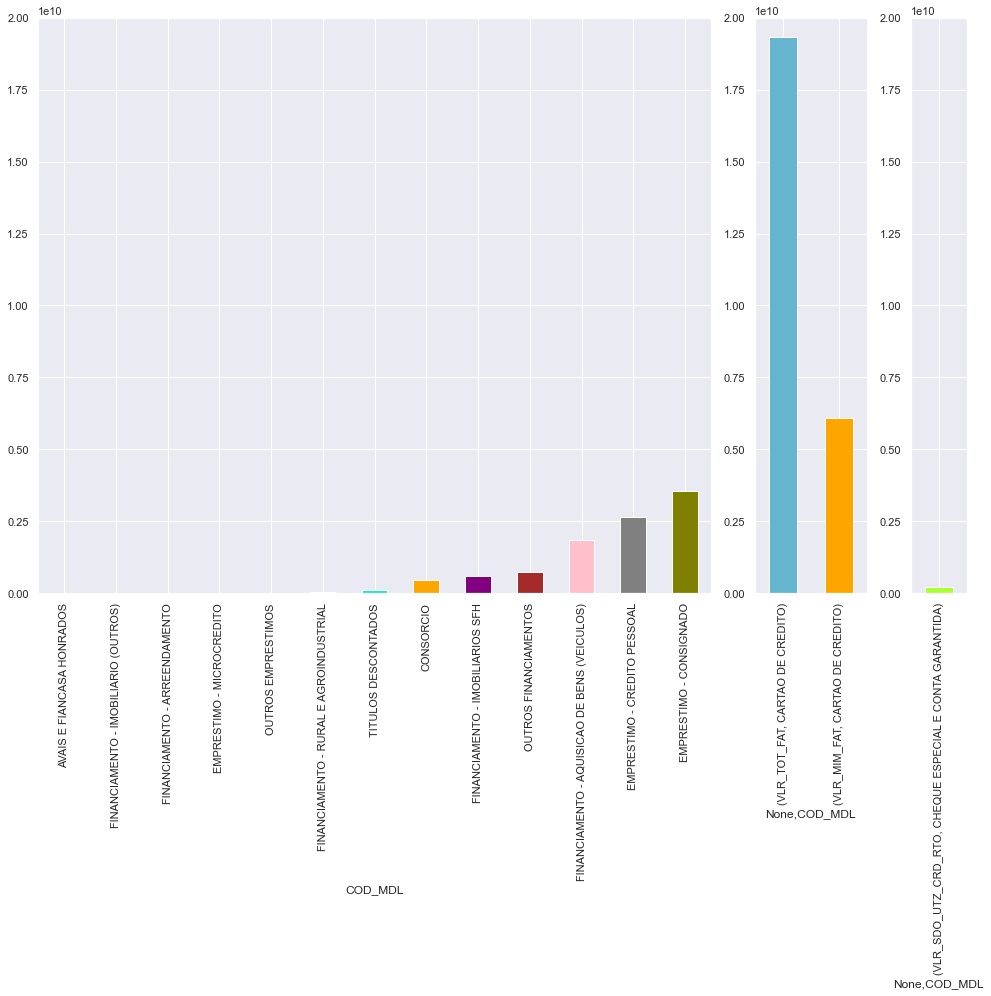

In [100]:
#Plota os três gráficos de modalidade lado a lado
fig = plt.figure(figsize=(14, 14)) 

gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.25])

ax0 = plt.subplot(gs[0])
ax0 = parcela.plot(kind='bar', color=['r', 'g', 'b', 'k', 'm', 'y', 'xkcd:aqua', 'orange',
                                      'purple', 'brown', 'pink', 'gray', 'olive'])
ax1 = plt.subplot(gs[1])
ax1 = credito.plot(kind='bar', color=['c', 'orange'])
ax2 = plt.subplot(gs[2])
ax2 = cheque.plot(kind='bar', color=['xkcd:lime'])

ax0.set_ylim(0,20000000000)
ax1.set_ylim(0,20000000000)
ax2.set_ylim(0,20000000000)

plt.tight_layout()

c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not 

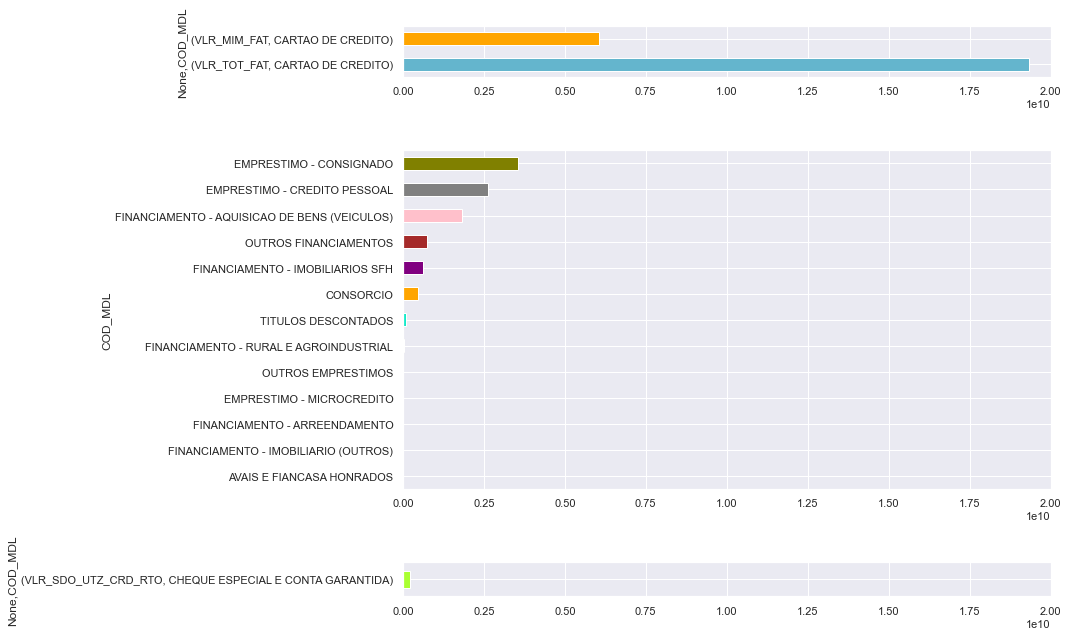

In [101]:
#Plota em gráfico de barras horizontal
fig = plt.figure(figsize=(15, 9)) 

gs = gridspec.GridSpec(3, 1, height_ratios=[0.15, 1, 0.1])

ax1 = plt.subplot(gs[0])
ax1 = credito.plot(kind='barh', color=['c', 'orange'])

ax0 = plt.subplot(gs[1])
ax0 = parcela.plot(kind='barh', color=['r', 'g', 'b', 'k', 'm', 'y', 'xkcd:aqua', 'orange',
                                      'purple', 'brown', 'pink', 'gray', 'olive'])
ax2 = plt.subplot(gs[2])
ax2 = cheque.plot(kind='barh', color=['xkcd:lime'])

ax0.set_xlim(0,20000000000)
ax1.set_xlim(0,20000000000)
ax2.set_xlim(0,20000000000)

plt.tight_layout()

# Exibindo todos os gráficos gerados

In [223]:
modalreview = pd.DataFrame({'Validação': ['Códigos das Modalidades'],
                            'Código Validados': [porcentagem],
                            'Códigos Invalidados': [diferenca]})
modalreview = modalreview[['Validação', 'Código Validados', 'Códigos Invalidados']].groupby(['Validação']).max().dropna().unstack()

In [225]:
parcelreview = pd.DataFrame({'Validações': ['Valor das Parcelas', 'Valor Mínimo da Fatura do Cartão de Crédito', 
                             'Valor Total da Fatura do Cartão de Crédito', 'Quantidade de Clientes', 
                             'Quantidade de Movimentações', 'Saldo Devedor do Cheque Especial'],
                             'Campos Válidos': [coluna.notna().mean().round(4) * 100 for coluna in colunas], 
                             'Campos Incompletos': [coluna.isna().mean().round(4) * 100 for coluna in colunas]})
parcelreview = parcelreview[['Validações', 'Campos Válidos', 'Campos Incompletos']].groupby(['Validações']).max().dropna().unstack()

c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib

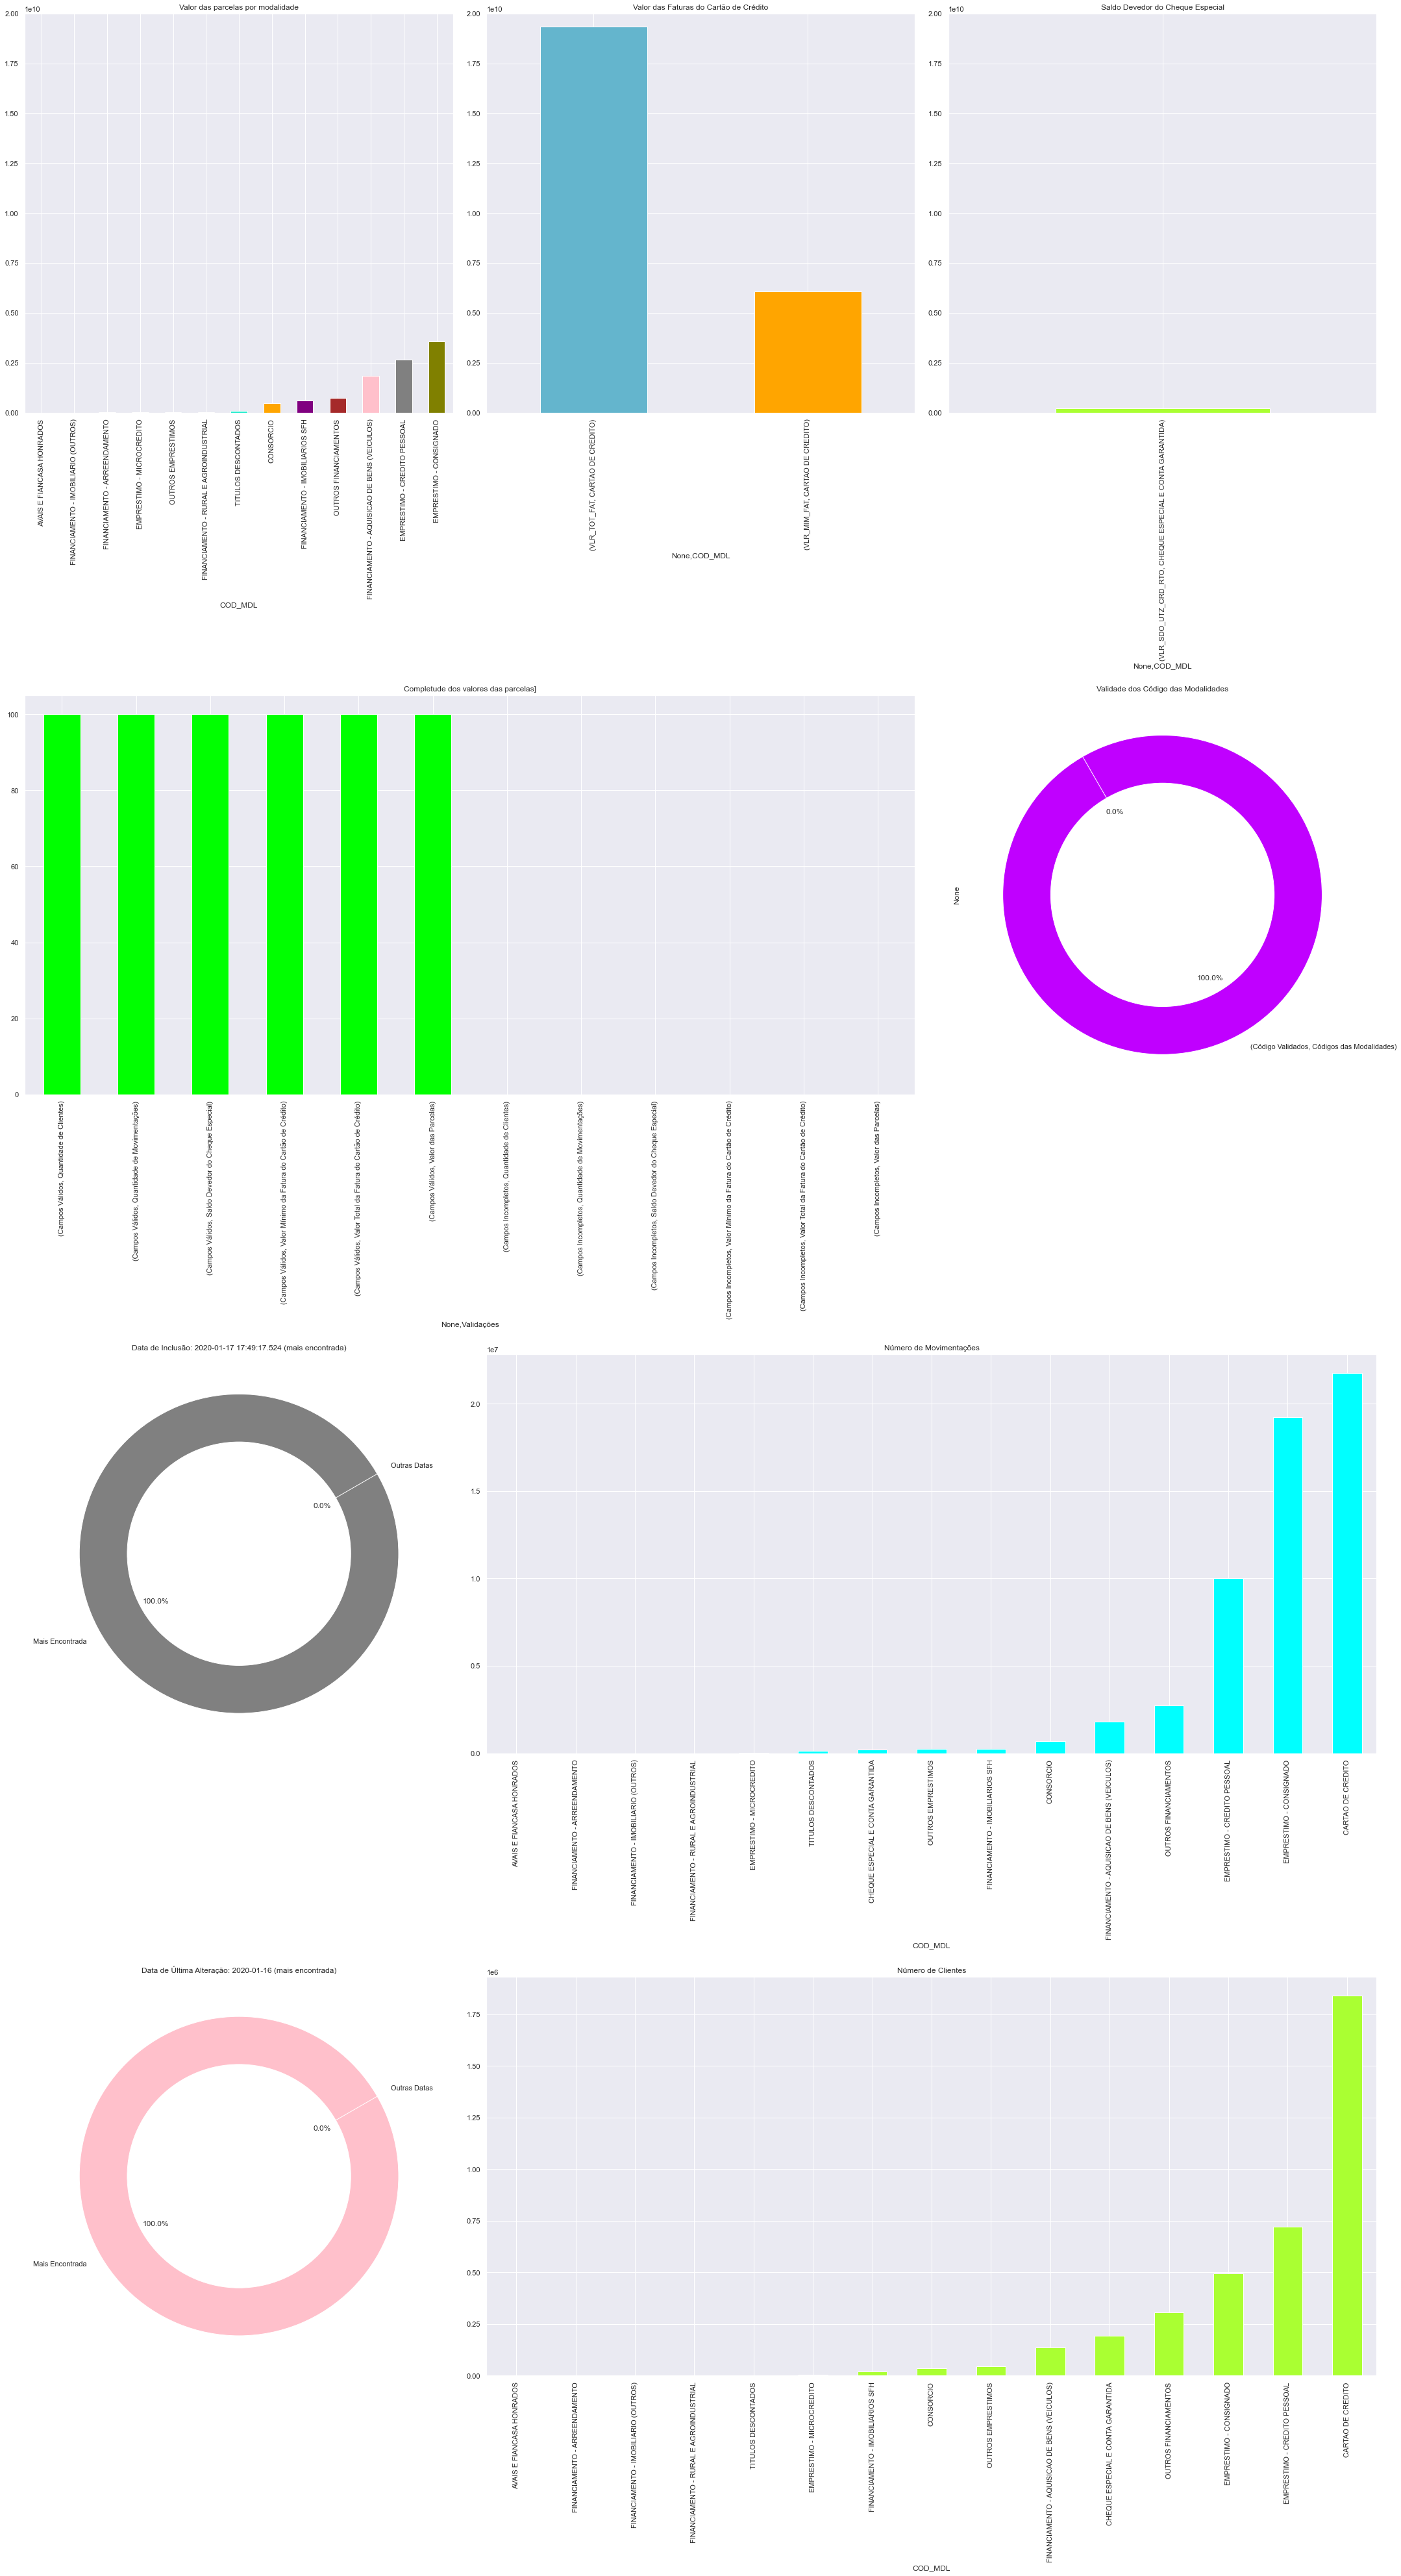

In [324]:
fig3 = plt.figure(constrained_layout=True, figsize = (30,55))

gs = fig3.add_gridspec(4, 3)

f3_ax1 = fig3.add_subplot(gs[0, 0])
f3_ax1.set_title('Valor das parcelas por modalidade')
f3_ax1 = parcela.plot(kind='bar', color=['r', 'g', 'b', 'k', 'm', 'y', 'xkcd:aqua', 'orange',
                                         'purple', 'brown', 'pink', 'gray', 'olive'])
f3_ax1.set_ylim(0,20000000000)

f3_ax6 = fig3.add_subplot(gs[0, 1])
f3_ax6.set_title('Valor das Faturas do Cartão de Crédito')
f3_ax6 = credito.plot(kind='bar', color=['c', 'orange'])
f3_ax6.set_ylim(0,20000000000)

f3_ax7 = fig3.add_subplot(gs[0, 2])
f3_ax7.set_title('Saldo Devedor do Cheque Especial')
f3_ax7 = cheque.plot(kind='bar', color=['xkcd:lime'])
f3_ax7.set_ylim(0,20000000000)

f3_ax5 = fig3.add_subplot(gs[1, 0:2])
f3_ax5.set_title('Completude dos valores das parcelas]')
f3_ax5 = parcelreview.plot(kind='bar', color=['lime'], stacked =True)

f3_ax3 = fig3.add_subplot(gs[1, 2])
f3_ax3.set_title('Validade dos Código das Modalidades')
f3_ax3 = modalreview.plot(kind='pie', colors = ['#c000ff'], autopct='%1.1f%%', startangle=120, wedgeprops=dict(width=.3))

f3_ax8 = fig3.add_subplot(gs[2, 0])
f3_ax8.set_title('%s' % panel)
f3_ax8.pie(td[panel], labels=labels, colors = ['gray'], autopct='%1.1f%%', startangle=30,
           wedgeprops=dict(width=.3))

f3_ax4 = fig3.add_subplot(gs[2, 1:])
f3_ax4.set_title('Número de Movimentações')
f3_ax4 = movimentacao.plot(kind='bar', color=['aqua'])

f3_ax9 = fig3.add_subplot(gs[3, 0])
f3_ax9.set_title('%s' % panelb)
f3_ax9.pie(td[panelb], labels=labels, colors = ['pink'], autopct='%1.1f%%', startangle=30,
           wedgeprops=dict(width=.3))

f3_ax2 = fig3.add_subplot(gs[3, 1:3])
f3_ax2.set_title('Número de Clientes')
f3_ax2 = cliente.plot(kind='bar', color=['xkcd:lime'])
